In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

In [3]:
# Define the positive and negative classes
positive_class = np.array([(-2, 3), (0, 1), (2, -1)])   # consider the class label as +1
negative_class = np.array([(-2, 1), (0, -1), (2, -3)])   # consider the class label as -1

Text(0, 0.5, 'x2')

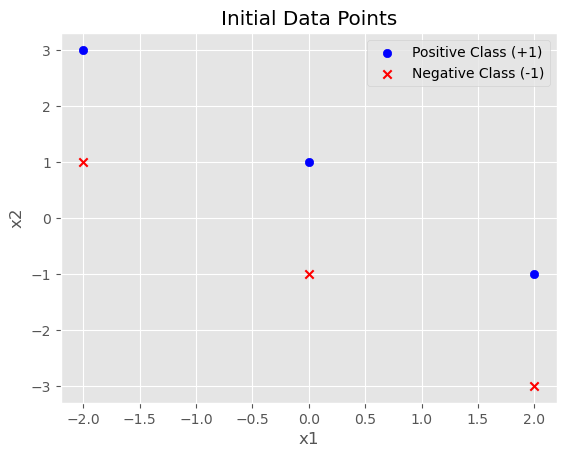

In [4]:
# Plot initial data points
plt.scatter(positive_class[:, 0], positive_class[:, 1], marker='o', color='blue', label='Positive Class (+1)')
plt.scatter(negative_class[:, 0], negative_class[:, 1], marker='x', color='red', label='Negative Class (-1)')
plt.legend(loc='best')
plt.title('Initial Data Points')
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')

In [5]:
# Combine all points as data
# data
X = np.vstack((positive_class, negative_class))
# labels
y = np.hstack((np.ones(np.shape(positive_class)[0], dtype = np.int64), np.ones(np.shape(negative_class)[0], dtype = np.int64) * -1))

In [19]:
def plot_decision_boundary(theta, theta0, T):
    plt.scatter(positive_class[:, 0], positive_class[:, 1], marker='o', color='blue', label='Positive Class (+1)')
    plt.scatter(negative_class[:, 0], negative_class[:, 1], marker='*', color='red', label='Negative Class (+1)')
    x_vals = np.linspace(np.min(positive_class[:, 0]), np.max(positive_class[:, 0]), 2)
    try:
        y_vals = -(theta[0] * x_vals + theta0) / theta[1]
        plt.plot(x_vals, y_vals, color='green', label='Decision Iteration {T}.')
    except ZeroDivisionError:
        x_vals = -theta0 / theta[0]
        plt.axvline(x=x_vals, color='green', label='Decision Iteartion {T}.')
    
    plt.xlim(-3, 3)
    plt.ylim(-4, 4)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f"Perceptron Linear classifier at iteration {T}.")
    plt.grid(True)
    plt.legend(loc='best')

In [ ]:
# Perceptron Algorithm
def perceptron(X, y, steps=100):    # steps::epoch. Maximum mistakes should be equal to T, which is (R/gamma)^2 but it can be only be found after theta is found, which makes here a deadlock.
    # Initialize weights and bias
    theta = np.zeros(X.shape[1])
    theta0 = 0
    
    for T in range(steps):
        for i in range(X.shape[0]):
            if y[i] * np.sign(np.dot(X[i], theta) + theta0) <= 0:
                theta += y[i] * X[i]
                theta0 += y[i]
                break   # prevents oscillations between corrections. Better convergence properties for linearly separable data aligns with the formal perceptron algorithm.
        # Plot after each iterations
        plt.pause(0.5)
        plot_decision_boundary(theta, theta0, T+1)
    return theta, theta0

In [ ]:
theta_final, theta0_final = perceptron(X, y, 100)